## Problem 91: Right triangles with integer coordinates


In [107]:
function isrighttriangle(sides)
    sort!(sides)
    if abs(sides[1]^2 + sides[2]^2 - sides[3]^2) < 1e-10
        return true
    else
        return false
    end

end

isrighttriangle (generic function with 1 method)

In [140]:
function runit(xymax)
    points = ((x,y) for x = 0:xymax for y = 0:xymax if !((x == 0) & (y == 0)))
    righttriangles = []
    visited = Dict()
    for p in points
        for q in points
            if (q[1] >= p[1])
                s1 = sqrt(p[1]^2 + p[2]^2)
                s2 = sqrt(q[1]^2 + q[2]^2)
                s3 = sqrt((p[1] - q[1])^2 + (p[2] - q[2])^2)
                sides = [s1, s2, s3]
                if !(any(sides .== 0)) & isrighttriangle(sides)
                    if !(haskey(visited, (p,q)) | haskey(visited, (q,p)))
                        visited[(p,q)] = true
                        push!(righttriangles, (p,q))
                    end
                end
            end
        end
    end
    return length(righttriangles)
end

runit (generic function with 1 method)

In [164]:
t = []
nn = 1:50
for n = nn
    push!(t, @elapsed runit(n))
end

In [154]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


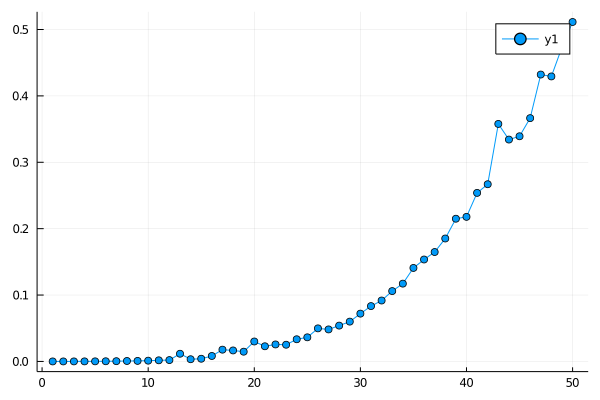

In [168]:
plot(nn, t, shape = :circle)